<a href="https://colab.research.google.com/github/ykumar2020/-ykumar2020-Csharp22SP-ykumar/blob/main/freshRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TEST on Syntetic Data (generated by Gemini and ChatGPT)**

### **1. Data Load**

In [2]:
# Ensure you have access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'

In [4]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [5]:
!pip install accelerate -U

In [6]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00


## **sentence-transformers/all-MiniLM-L6-v2' - cyberbullying detection authetical, age is here gender is on HPC machine**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


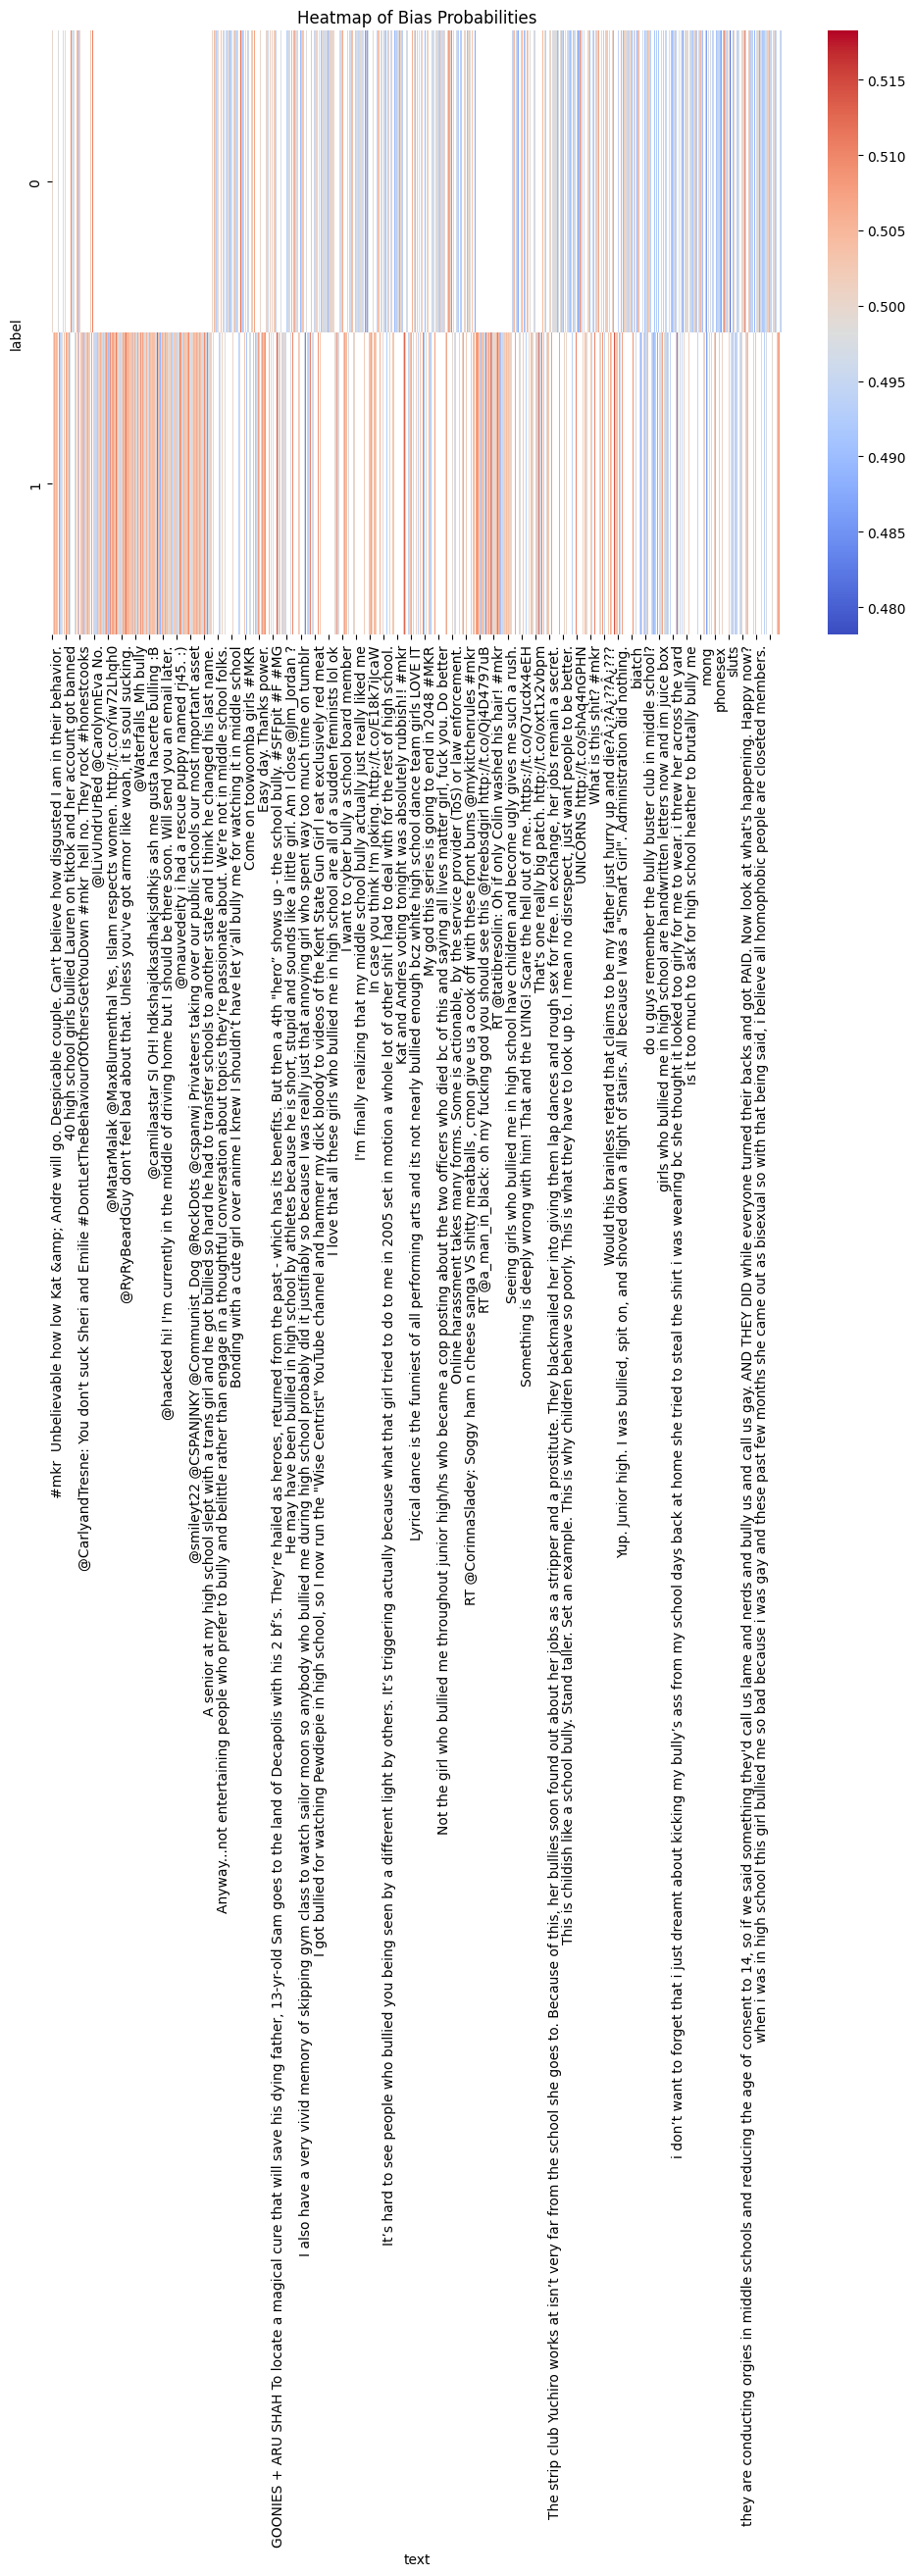

In [12]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]
data = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data.extend(file.readlines())

# Load the bad words dataset
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create a DataFrame
df = pd.DataFrame(data, columns=['text'])
df['label'] = [0 if i < len(data) / 2 else 1 for i in range(len(data))]

# Add bad words data to the DataFrame
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
df = pd.concat([df, badwords_age_df, badwords_notcb_df], ignore_index=True)

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Function to get bias probability
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

# Calculate bias probabilities and add to DataFrame
df['Bias Probability'] = df['text'].apply(get_bias_probability)

# Generate the heatmap without text annotations
plt.figure(figsize=(12, 8))
df_pivot = df.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean')
sns.heatmap(df_pivot, annot=False, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
heatmap_file_path = f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png'
plt.savefig(heatmap_file_path)
plt.show()


## **gender**

In [9]:
!pip install transformers[torch]
!pip install accelerate -U


In [8]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_paths = [
    '/content/drive/MyDrive/cyber/8000gender.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]
data = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data.extend(file.readlines())

# Load the bad words dataset
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create a DataFrame
df = pd.DataFrame(data, columns=['text'])
df['label'] = [0 if i < len(data) / 2 else 1 for i in range(len(data))]

# Add bad words data to the DataFrame
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
df = pd.concat([df, badwords_age_df, badwords_notcb_df], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)

# Tokenize the data
def tokenize_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You are not a man, you are like a woman.", "Think like a man"]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions.logits, axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df['Biased Tokens'] = df['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index, palette='viridis')
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.show()

# Save visualizations to disk
heatmap_file_path = '/content/drive/MyDrive/cyber/heatmap_bias_probabilities.png'
boxplot_file_path = '/content/drive/MyDrive/cyber/boxplot_bias_probabilities.png'
barplot_file_path = '/content/drive/MyDrive/cyber/barplot_bias_probabilities.png'
histplot_file_path = '/content/drive/MyDrive/cyber/histplot_bias_probabilities.png'
scatterplot_file_path = '/content/drive/MyDrive/cyber/scatterplot_bias_probabilities.png'
top_tokens_file_path = '/content/drive/MyDrive/cyber/top_biased_tokens.png'

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Heatmap of Bias Probabilities
df_pivot = df.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(heatmap_file_path)
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(boxplot_file_path)
plt.close()

# Function to get bias probability
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

# Calculate bias probabilities and add to DataFrame
df['Bias Probability'] = df['text'].apply(get_bias_probability)

# Generate the heatmap
plt.figure(figsize=(12, 8))
df_pivot = df.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean')
sns.heatmap(df_pivot, annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
heatmap_file_path = f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png'
plt.savefig(heatmap_file_path)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

## **sentence-transformers/all-MiniLM-L6-v2' - bias detection synthetic**

In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Inspect the dataset columns
print("Dataset columns:", df.columns)

# Ensure the columns exist in the dataset
if 'Neutral Context' not in df.columns or 'Biased Context' not in df.columns:
    raise KeyError("The dataset must contain 'Neutral Context' and 'Biased Context' columns.")

# Load bad words datasets
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create DataFrames for bad words
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
badwords_combined_df = pd.concat([badwords_age_df, badwords_notcb_df], ignore_index=True)

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Add bad words data to the combined DataFrame
df_combined = pd.concat([df_combined, badwords_combined_df], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)

# Tokenize the data
def tokenize_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Custom model class to handle bias token prediction
class CustomModel(AutoModelForSequenceClassification):
    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = super().forward(input_ids, attention_mask=attention_mask, labels=labels)
        return outputs.logits, outputs.attentions

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions[0], axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df_combined['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df_combined['Biased Tokens'] = df_combined['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df_combined['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index)
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.savefig(f'/content/drive/MyDrive/cyber/top_biased_tokens_{timestamp}.png')
plt.close()

# Add Bias Probability calculation
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

df_combined['Bias Probability'] = df_combined['text'].apply(get_bias_probability)

# Heatmap of Bias Probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean'), annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png')
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df_combined)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(f'/content/drive/MyDrive/cyber/boxplot_bias_probabilities_{timestamp}.png')
plt.close()

# Histogram of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Bias Probability', hue='label', multiple="stack", bins=20)
plt.title('Distribution of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/histplot_bias_probabilities_{timestamp}.png')
plt.close()

# Scatter Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bias Probability', y='label', data=df_combined, hue='label')
plt.title('Comparison of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/scatterplot_bias_probabilities_{timestamp}.png')
plt.close()

# Save summary statistics and null values to CSV
summary_stats = df_combined.describe()
summary_stats.to_csv(f'/content/drive/MyDrive/cyber/summary_statistics_{timestamp}.csv')
null_values = df_combined.isnull().sum()
null_values.to_csv(f'/content/drive/MyDrive/cyber/null_values_{timestamp}.csv')

print("Graphs generated and summary statistics saved.")



## **yuhuixu/mistral-bias-0.9**

In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Inspect the dataset columns
print("Dataset columns:", df.columns)

# Ensure the columns exist in the dataset
if 'Neutral Context' not in df.columns or 'Biased Context' not in df.columns:
    raise KeyError("The dataset must contain 'Neutral Context' and 'Biased Context' columns.")

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer, AdamW
import pandas as pd

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(word.strip().lower() for word in file.readlines())

# Load bad words
bad_words_age = load_bad_words('/path/to/badwords_age.txt')
bad_words_notcb = load_bad_words('/path/to/badwords_notcb.txt')

# Combine bad words into a dictionary with labels
bad_words_dict = {word: 0 for word in bad_words_age}
bad_words_dict.update({word: 1 for word in bad_words_notcb})

# Mock-up DataFrame creation (replace with actual data loading)
df = pd.DataFrame({'Neutral Context': ['example sentence one'], 'Biased Context': ['example sentence two']})

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Adding dummy bad words data for completeness (replace with actual data preparation)
df_combined = pd.concat([df_combined, pd.DataFrame({
    'text': ['bad example one', 'bad example two'],
    'label': [0, 1]
})], ignore_index=True)

# Custom Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.encodings = tokenizer(dataframe['text'].tolist(), truncation=True, padding=True, max_length=max_length)
        self.labels = dataframe['label'].tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Model Definition
class DistilBertWithBadWords(nn.Module):
    def __init__(self, num_labels=2):
        super().__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.dim + 1, num_labels)

    def forward(self, input_ids, attention_mask, bad_words_feature):
        distilbert_output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = distilbert_output.last_hidden_state[:, 0]
        combined_features = torch.cat((pooled_output, bad_words_feature.unsqueeze(1)), dim=1)
        logits = self.classifier(combined_features)
        return logits

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dataset and DataLoader
dataset = SentenceDataset(df_combined, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model and Training Setup
model = DistilBertWithBadWords()
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        # Assume a function to calculate bad words feature
        bad_words_feature = torch.zeros(labels.size(0), 1).to(device)  # Placeholder
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, bad_words_feature)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader)}")





# Load bad words datasets
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create DataFrames for bad words
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
badwords_combined_df = pd.concat([badwords_age_df, badwords_notcb_df], ignore_index=True)

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Add bad words data to the combined DataFrame
df_combined = pd.concat([df_combined, badwords_combined_df], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)
tokenizer.pad_token = tokenizer.eos_token  # Set the padding token to the end-of-sequence token
model = AutoModelForSequenceClassification.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)

# Tokenize the data
def tokenize_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Custom model class to handle bias token prediction
class CustomModel(AutoModelForSequenceClassification):
    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = super().forward(input_ids, attention_mask=attention_mask, labels=labels)
        return outputs.logits, outputs.attentions

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions[0], axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df_combined['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df_combined['Biased Tokens'] = df_combined['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df_combined['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index)
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.savefig(f'/content/drive/MyDrive/cyber/top_biased_tokens_{timestamp}.png')
plt.close()

# Add Bias Probability calculation
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

df_combined['Bias Probability'] = df_combined['text'].apply(get_bias_probability)

# Heatmap of Bias Probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean'), annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png')
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df_combined)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(f'/content/drive/MyDrive/cyber/boxplot_bias_probabilities_{timestamp}.png')
plt.close()

# Histogram of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Bias Probability', hue='label', multiple="stack", bins=20)
plt.title('Distribution of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/histplot_bias_probabilities_{timestamp}.png')
plt.close()

# Scatter Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bias Probability', y='label', data=df_combined, hue='label')
plt.title('Comparison of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/scatterplot_bias_probabilities_{timestamp}.png')
plt.close()

# Save summary statistics and null values to CSV
summary_stats = df_combined.describe()
summary_stats.to_csv(f'/content/drive/MyDrive/cyber/summary_statistics_{timestamp}.csv')
null_values = df_combined.isnull().sum()
null_values.to_csv(f'/content/drive/MyDrive/cyber/null_values_{timestamp}.csv')

print("Graphs generated and summary statistics saved.")

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("d4data/bias-detection-model")
model = TFAutoModelForSequenceClassification.from_pretrained("d4data/bias-detection-model")

# Create a pipeline for text classification
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Function to get bias probability
def get_bias_probability(text):
    """Calculates the bias probability of a given text using a pre-trained model."""
    result = classifier(text, return_all_scores=True)[0]
    bias_probability = result[1]['score']  # Assuming the second index is for biased class
    return float(bias_probability)

# Function to highlight bias tokens
def highlight_bias_tokens(text):
    """Highlight tokens that contribute to bias using the attention mechanism of the model."""
    inputs = tokenizer(text, return_tensors="tf")
    outputs = model(inputs)
    attentions = outputs.attentions[-1].numpy()

    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].numpy()[0])
    attention = attentions.mean(axis=1).squeeze()

    token_attention = {tokens[i]: attention[i] for i in range(len(tokens)) if tokens[i] != '[PAD]'}
    return token_attention

# Sample input data extracted from the provided image
data = {
    "Word/Phr": ["Assertive", "Outspoken", "Emotional", "Demanding", "Opinionated", "Ambitious", "Confident", "Independent", "Direct", "Passionate", "Driven", "Forceful", "Headstrong", "Sensitive", "Creative", "Intuitive", "Eloquent", "Charming", "Decisive", "Persistent"],
    "Neutral Context": [
        "She presented her ideas assertively.",
        "He is an outspoken feminist.",
        "The movie was very emotional.",
        "The project is demanding a lot of resources.",
        "He has strong opinions.",
        "She has ambitious plans.",
        "He exuded confidence.",
        "She values her independence.",
        "Her communication style is direct.",
        "He's passionate about his work.",
        "She's a driven individual.",
        "The speaker's tone was forceful.",
        "He's a headstrong leader.",
        "She's very sensitive.",
        "She has a creative mind.",
        "Her intuition is strong.",
        "He has an eloquent speaking style.",
        "She has a charming personality.",
        "She's a decisive person.",
        "He is persistent in his efforts."
    ],
    "Biased Context": [
        "The woman was too assertive for a leadership position.",
        "The outspoken feminist alienated potential allies.",
        "She's too emotional to handle the stress of the job.",
        "The client is overly demanding and difficult to please.",
        "She's too opinionated and unwilling to compromise.",
        "Her ambition is off-putting and intimidating.",
        "He's overly confident and arrogant.",
        "The single mother is too independent and doesn't need anyone's help.",
        "She's too direct and abrasive.",
        "Her passion makes her seem irrational and unstable.",
        "His drive for success comes at the expense of others.",
        "The woman's forceful personality was seen as a threat.",
        "He's too headstrong and difficult to manage.",
        "She's overly sensitive and takes things too personally.",
        "Her creative ideas are impractical and unrealistic.",
        "Her intuition is not a substitute for logical reasoning.",
        "Her eloquence masks her lack of substance.",
        "Her charm is manipulative and deceitful.",
        "His decisiveness borders on impulsiveness.",
        "Her persistence is annoying and bothersome."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Process CSV to calculate bias probabilities and highlight bias tokens
def process_csv(df):
    df['Neutral Bias Probability'] = df['Neutral Context'].apply(get_bias_probability)
    df['Biased Bias Probability'] = df['Biased Context'].apply(get_bias_probability)
    df['Biased Tokens'] = df['Biased Context'].apply(highlight_bias_tokens)
    return df

df = process_csv(df)

# Display the DataFrame with the bias probabilities and highlighted tokens
print(df)

# Generate plots for bias probabilities
def generate_plots(df):
    # Melt the DataFrame to long format for plotting
    df_melted = df.melt(id_vars='Word/Phr', value_vars=['Neutral Bias Probability', 'Biased Bias Probability'], var_name='Context', value_name='Bias Probability')

    # Bar plot for Neutral vs Biased Context Bias Probabilities
    chart1 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Word/Phr:N', axis=alt.Axis(labelAngle=-45)),
        y=alt.Y('Bias Probability:Q'),
        color='Context:N',
        tooltip=['Word/Phr', 'Context', 'Bias Probability']
    ).properties(
        title='Bias Probabilities for Neutral vs Biased Contexts'
    ).interactive()

    # Save chart1 to disk
    chart1.save('/content/drive/MyDrive/cyber/bias_probabilities_bar_chart.html')

    # Scatter plot for Bias Probabilities comparison
    chart2 = alt.Chart(df).mark_circle().encode(
        x='Neutral Bias Probability:Q',
        y='Biased Bias Probability:Q',
        tooltip=['Word/Phr', 'Neutral Bias Probability', 'Biased Bias Probability']
    ).properties(
        title='Comparison of Bias Probabilities'
    ).interactive()

    # Save chart2 to disk
    chart2.save('/content/drive/MyDrive/cyber/bias_probabilities_scatter_plot.html')

    # Histogram of Bias Probabilities
    chart3 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Bias Probability:Q', bin=True),
        y=alt.Y('count()', title='Frequency'),
        color='Context:N',
        tooltip=[alt.Tooltip('Bias Probability:Q', bin=True), 'count()']
    ).properties(
        title='Distribution of Bias Probabilities'
    ).interactive()

    # Save chart3 to disk
    chart3.save('/content/drive/MyDrive/cyber/bias_probabilities_histogram.html')

    # Box plot for Bias Probabilities
    chart4 = alt.Chart(df_melted).mark_boxplot().encode(
        x='Context:N',
        y='Bias Probability:Q'
    ).properties(
        title='Box Plot of Bias Probabilities'
    ).interactive()

    # Save chart4 to disk
    chart4.save('/content/drive/MyDrive/cyber/bias_probabilities_box_plot.html')

    # Heatmap of Bias Probabilities
    heatmap_data = df_melted.pivot(index="Word/Phr", columns="Context", values="Bias Probability")
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
    plt.title("Heatmap of Bias Probabilities")
    plt.savefig("/content/drive/MyDrive/cyber/bias_probabilities_heatmap.png")
    plt.close()

    # Count of biased tokens
    biased_tokens = df['Biased Tokens'].apply(pd.Series).stack().reset_index(drop=True)
    biased_tokens_count = biased_tokens.value_counts()
    biased_tokens_count.to_csv("/content/drive/MyDrive/cyber/biased_tokens_counts.csv")
    print("Biased Tokens and their Counts:\n", biased_tokens_count.head(20))

# Generate plots and get biased token counts
generate_plots(df)


In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct-gguf")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/Phi-3-mini-4k-instruct-gguf", output_attentions=True)
classifier = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

# Function to calculate bias probability
def get_bias_probability(text):
    """Calculates the bias probability of a given text using a pre-trained model."""
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().cpu().numpy().squeeze()
    bias_probability = probabilities[1]  # Assuming the second index is for biased class
    return float(bias_probability)

# Function to highlight tokens contributing to bias
def highlight_bias_tokens(text):
    """Highlight tokens that contribute to bias using the attention mechanism of the model."""
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs, output_attentions=True)

    if outputs.attentions is not None:
        # Extract the last layer of attentions and compute the mean across the attention heads
        attention = torch.mean(outputs.attentions[-1], dim=1).squeeze().detach().cpu().numpy().tolist()
        tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids.squeeze().detach().cpu().numpy())
        token_attention = {tokens[i]: attention[i] for i in range(len(tokens)) if tokens[i] != '[PAD]'}
    else:
        token_attention = {}

    return token_attention

# Function to process CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path)

    df['Neutral Bias Probability'] = df['Neutral Context'].apply(get_bias_probability)
    df['Biased Bias Probability'] = df['Biased Context'].apply(get_bias_probability)

    # Highlight tokens contributing to bias in the Biased Context
    df['Biased Tokens'] = df['Biased Context'].apply(highlight_bias_tokens)

    return df

# Function to generate plots and count biased tokens
def generate_plots(df):
    # Melt the DataFrame to long format for plotting
    df_melted = df.melt(id_vars='Word/Phrase', value_vars=['Neutral Bias Probability', 'Biased Bias Probability'], var_name='Context', value_name='Bias Probability')

    # Bar plot for Neutral vs Biased Context Bias Probabilities
    chart1 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Word/Phrase:N', axis=alt.Axis(labelAngle=-45)),
        y=alt.Y('Bias Probability:Q'),
        color='Context:N',
        tooltip=['Word/Phrase', 'Context', 'Bias Probability']
    ).properties(
        title='Bias Probabilities for Neutral vs Biased Contexts'
    ).interactive()

    # Save chart1 to disk
    chart1.save('/content/drive/MyDrive/cyber/bias_probabilities_bar_chart_phi3.html')

    # Scatter plot for Bias Probabilities comparison
    chart2 = alt.Chart(df).mark_circle().encode(
        x='Neutral Bias Probability:Q',
        y='Biased Bias Probability:Q',
        tooltip=['Word/Phrase', 'Neutral Bias Probability', 'Biased Bias Probability']
    ).properties(
        title='Comparison of Bias Probabilities'
    ).interactive()

    # Save chart2 to disk
    chart2.save('/content/drive/MyDrive/cyber/bias_probabilities_scatter_plot_phi3.html')

    # Histogram of Bias Probabilities
    chart3 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Bias Probability:Q', bin=True),
        y=alt.Y('count()', title='Frequency'),
        color='Context:N',
        tooltip=[alt.Tooltip('Bias Probability:Q', bin=True), 'count()']
    ).properties(
        title='Distribution of Bias Probabilities'
    ).interactive()

    # Save chart3 to disk
    chart3.save('/content/drive/MyDrive/cyber/bias_probabilities_histogram_phi3.html')

    # Box plot for Bias Probabilities
    chart4 = alt.Chart(df_melted).mark_boxplot().encode(
        x='Context:N',
        y='Bias Probability:Q'
    ).properties(
        title='Box Plot of Bias Probabilities'
    ).interactive()

    # Save chart4 to disk
    chart4.save('/content/drive/MyDrive/cyber/bias_probabilities_box_plot_phi3.html')

    # Heatmap of Bias Probabilities
    heatmap_data = df_melted.pivot(index="Word/Phrase", columns="Context", values="Bias Probability")
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
    plt.title("Heatmap of Bias Probabilities")
    plt.savefig("/content/drive/MyDrive/cyber/bias_probabilities_heatmap_phi3.png")
    plt.close()

    # Count of biased tokens
    biased_tokens = df['Biased Tokens'].apply(pd.Series).stack().reset_index(drop=True)
    biased_tokens_count = biased_tokens.value_counts()
    biased_tokens_count.to_csv("/content/drive/MyDrive/cyber/biased_tokens_counts_phi3.csv")
    print("Biased Tokens and their Counts:\n", biased_tokens_count)

    # Display top 20 biased tokens
    print("Top 20 Biased Tokens:\n", biased_tokens_count.head(20))

# Process CSV file
csv_file_path = 'bias_test_cases.csv'
df = process_csv(csv_file_path)

# Generate plots and count biased tokens
generate_plots(df)


In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("yuhuixu/mistral-bias-0.9")
model = AutoModelForSequenceClassification.from_pretrained("yuhuixu/mistral-bias-0.9", output_attentions=True)
classifier = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

# The function get_bias_probability calculates the probability that a given text is biased.
def get_bias_probability(text):
    """Calculates the bias probability of a given text using a pre-trained model."""
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().cpu().numpy().squeeze()
    bias_probability = probabilities[1]  # Assuming the second index is for biased class
    return float(bias_probability)

def highlight_bias_tokens(text):
    """Highlight tokens that contribute to bias using the attention mechanism of the model."""
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs, output_attentions=True)

    if outputs.attentions is not None:
        # Extract the last layer of attentions and compute the mean across the attention heads
        attention = torch.mean(outputs.attentions[-1], dim=1).detach().cpu().numpy().tolist()
        tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids.squeeze().detach().cpu().numpy())

        # Ensure the lengths of tokens and attention match
        min_len = min(len(tokens), len(attention))
        tokens = tokens[:min_len]
        attention = attention[:min_len]

        token_attention = {tokens[i]: attention[i] for i in range(len(tokens)) if tokens[i] != '[PAD]'}
    else:
        token_attention = {}

    return token_attention

# process_csv reads the CSV file and applies the get_bias_probability function to calculate bias probabilities for both neutral and biased contexts.
def process_csv(file_path):
    df = pd.read_csv(file_path)

    df['Neutral Bias Probability'] = df['Neutral Context'].apply(get_bias_probability)
    df['Biased Bias Probability'] = df['Biased Context'].apply(get_bias_probability)

    # Highlight tokens contributing to bias in the Biased Context
    df['Biased Tokens'] = df['Biased Context'].apply(highlight_bias_tokens)

    return df

# Plot Generation
def generate_plots(df):
    # Melt the DataFrame to long format for plotting
    df_melted = df.melt(id_vars='Word/Phrase', value_vars=['Neutral Bias Probability', 'Biased Bias Probability'], var_name='Context', value_name='Bias Probability')

    # Bar plot for Neutral vs Biased Context Bias Probabilities
    chart1 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Word/Phrase:N', axis=alt.Axis(labelAngle=-45)),
        y=alt.Y('Bias Probability:Q'),
        color='Context:N',
        tooltip=['Word/Phrase', 'Context', 'Bias Probability']
    ).properties(
        title='Bias Probabilities for Neutral vs Biased Contexts'
    ).interactive()

    # Save chart1 to disk
    chart1.save('/content/drive/MyDrive/cyber/bias_probabilities_bar_chart.html')

    # Scatter plot for Bias Probabilities comparison
    chart2 = alt.Chart(df).mark_circle().encode(
        x='Neutral Bias Probability:Q',
        y='Biased Bias Probability:Q',
        tooltip=['Word/Phrase', 'Neutral Bias Probability', 'Biased Bias Probability']
    ).properties(
        title='Comparison of Bias Probabilities'
    ).interactive()

    # Save chart2 to disk
    chart2.save('/content/drive/MyDrive/cyber/bias_probabilities_scatter_plot.html')

    # Histogram of Bias Probabilities
    chart3 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Bias Probability:Q', bin=True),
        y=alt.Y('count()', title='Frequency'),
        color='Context:N',
        tooltip=[alt.Tooltip('Bias Probability:Q', bin=True), 'count()']
    ).properties(
        title='Distribution of Bias Probabilities'
    ).interactive()

    # Save chart3 to disk
    chart3.save('/content/drive/MyDrive/cyber/bias_probabilities_histogram.html')

    # Box plot for Bias Probabilities
    chart4 = alt.Chart(df_melted).mark_boxplot().encode(
        x='Context:N',
        y='Bias Probability:Q'
    ).properties(
        title='Box Plot of Bias Probabilities'
    ).interactive()

    # Save chart4 to disk
    chart4.save('/content/drive/MyDrive/cyber/bias_probabilities_box_plot.html')

    # Heatmap of Bias Probabilities
    heatmap_data = df_melted.pivot(index="Word/Phrase", columns="Context", values="Bias Probability")
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
    plt.title("Heatmap of Bias Probabilities")
    plt.savefig("/content/drive/MyDrive/cyber/bias_probabilities_heatmap.png")
    plt.show()

    # Count of biased tokens
    biased_tokens = df['Biased Tokens'].apply(pd.Series).stack().reset_index(drop=True)
    biased_tokens_count = biased_tokens.value_counts()
    biased_tokens_count.to_csv("/content/drive/MyDrive/cyber/biased_tokens_counts.csv")
    print("Biased Tokens and their Counts:\n", biased_tokens_count)

# Process CSV file
csv_file_path = 'bias_test_cases.csv'
df = process_csv(csv_file_path)

# Generate plots and get biased token counts
generate_plots(df)


In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/Phi-3-mini-4k-instruct", output_attentions=True)
classifier = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

# Function to get bias probability
def get_bias_probability(text):
    """Calculates the bias probability of a given text using a pre-trained model."""
    result = classifier(text, top_k=None)[0]
    print(f"Result for text '{text}': {result}")  # Print the result for debugging
    for res in result:
        if res['label'].lower() == 'biased':  # Adjust based on actual label names
            return float(res['score'])
    return 0.0  # Default if no biased label found

# Sample input data extracted from the provided image
data = {
    "Word/Phr": ["Assertive", "Outspoken", "Emotional", "Demanding", "Opinionated", "Ambitious", "Confident", "Independent", "Direct", "Passionate", "Driven", "Forceful", "Headstrong", "Sensitive", "Creative", "Intuitive", "Eloquent", "Charming", "Decisive", "Persistent"],
    "Neutral Context": [
        "She presented her ideas assertively.",
        "He is an outspoken feminist.",
        "The movie was very emotional.",
        "The project is demanding a lot of resources.",
        "He has strong opinions.",
        "She has ambitious plans.",
        "He exuded confidence.",
        "She values her independence.",
        "Her communication style is direct.",
        "He's passionate about his work.",
        "She's a driven individual.",
        "The speaker's tone was forceful.",
        "He's a headstrong leader.",
        "She's very sensitive.",
        "She has a creative mind.",
        "Her intuition is strong.",
        "He has an eloquent speaking style.",
        "She has a charming personality.",
        "She's a decisive person.",
        "He is persistent in his efforts."
    ],
    "Biased Context": [
        "The woman was too assertive for a leadership position.",
        "The outspoken feminist alienated potential allies.",
        "She's too emotional to handle the stress of the job.",
        "The client is overly demanding and difficult to please.",
        "She's too opinionated and unwilling to compromise.",
        "Her ambition is off-putting and intimidating.",
        "He's overly confident and arrogant.",
        "The single mother is too independent and doesn't need anyone's help.",
        "She's too direct and abrasive.",
        "Her passion makes her seem irrational and unstable.",
        "His drive for success comes at the expense of others.",
        "The woman's forceful personality was seen as a threat.",
        "He's too headstrong and difficult to manage.",
        "She's overly sensitive and takes things too personally.",
        "Her creative ideas are impractical and unrealistic.",
        "Her intuition is not a substitute for logical reasoning.",
        "Her eloquence masks her lack of substance.",
        "Her charm is manipulative and deceitful.",
        "His decisiveness borders on impulsiveness.",
        "Her persistence is annoying and bothersome."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Process CSV to calculate bias probabilities
def process_csv(df):
    df['Neutral Bias Probability'] = df['Neutral Context'].apply(get_bias_probability)
    df['Biased Bias Probability'] = df['Biased Context'].apply(get_bias_probability)
    return df

df = process_csv(df)

# Display the DataFrame with the bias probabilities
print(df)

# Generate plots for bias probabilities
def generate_plots(df):
    # Melt the DataFrame to long format for plotting
    df_melted = df.melt(id_vars='Word/Phr', value_vars=['Neutral Bias Probability', 'Biased Bias Probability'], var_name='Context', value_name='Bias Probability')

    # Bar plot for Neutral vs Biased Context Bias Probabilities
    chart1 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Word/Phr:N', axis=alt.Axis(labelAngle=-45)),
        y=alt.Y('Bias Probability:Q'),
        color='Context:N',
        tooltip=['Word/Phr', 'Context', 'Bias Probability']
    ).properties(
        title='Bias Probabilities for Neutral vs Biased Contexts'
    ).interactive()

    # Save chart1 to disk
    chart1.save('/content/drive/MyDrive/cyber/bias_probabilities_bar_chart.html')

    # Scatter plot for Bias Probabilities comparison
    chart2 = alt.Chart(df).mark_circle().encode(
        x='Neutral Bias Probability:Q',
        y='Biased Bias Probability:Q',
        tooltip=['Word/Phr', 'Neutral Bias Probability', 'Biased Bias Probability']
    ).properties(
        title='Comparison of Bias Probabilities'
    ).interactive()

    # Save chart2 to disk
    chart2.save('/content/drive/MyDrive/cyber/bias_probabilities_scatter_plot.html')

    # Histogram of Bias Probabilities
    chart3 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Bias Probability:Q', bin=True),
        y=alt.Y('count()', title='Frequency'),
        color='Context:N',
        tooltip=[alt.Tooltip('Bias Probability:Q', bin=True), 'count()']
    ).properties(
        title='Distribution of Bias Probabilities'
    ).interactive()

    # Save chart3 to disk
    chart3.save('/content/drive/MyDrive/cyber/bias_probabilities_histogram.html')

    # Box plot for Bias Probabilities
    chart4 = alt.Chart(df_melted).mark_boxplot().encode(
        x='Context:N',
        y='Bias Probability:Q'
    ).properties(
        title='Box Plot of Bias Probabilities'
    ).interactive()

    # Save chart4 to disk
    chart4.save('/content/drive/MyDrive/cyber/bias_probabilities_box_plot.html')

    # Heatmap of Bias Probabilities
    heatmap_data = df_melted.pivot(index="Word/Phr", columns="Context", values="Bias Probability")
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
    plt.title("Heatmap of Bias Probabilities")
    plt.savefig("/content/drive/MyDrive/cyber/bias_probabilities_heatmap.png")
    plt.close()

# Generate plots and get biased token counts
generate_plots(df)


In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("d4data/bias-detection-model")
model = TFAutoModelForSequenceClassification.from_pretrained("d4data/bias-detection-model")

# Create a pipeline for text classification
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Function to get bias probability
def get_bias_probability(text):
    """Calculates the bias probability of a given text using a pre-trained model."""
    result = classifier(text, top_k=None)[0]
    bias_probability = result[1]['score']  # Assuming the second index is for biased class
    return float(bias_probability)

# Sample input data extracted from the provided image
data = {
    "Word/Phr": ["Assertive", "Outspoken", "Emotional", "Demanding", "Opinionated", "Ambitious", "Confident", "Independent", "Direct", "Passionate", "Driven", "Forceful", "Headstrong", "Sensitive", "Creative", "Intuitive", "Eloquent", "Charming", "Decisive", "Persistent"],
    "Neutral Context": [
        "She presented her ideas assertively.",
        "He is an outspoken feminist.",
        "The movie was very emotional.",
        "The project is demanding a lot of resources.",
        "He has strong opinions.",
        "She has ambitious plans.",
        "He exuded confidence.",
        "She values her independence.",
        "Her communication style is direct.",
        "He's passionate about his work.",
        "She's a driven individual.",
        "The speaker's tone was forceful.",
        "He's a headstrong leader.",
        "She's very sensitive.",
        "She has a creative mind.",
        "Her intuition is strong.",
        "He has an eloquent speaking style.",
        "She has a charming personality.",
        "She's a decisive person.",
        "He is persistent in his efforts."
    ],
    "Biased Context": [
        "The woman was too assertive for a leadership position.",
        "The outspoken feminist alienated potential allies.",
        "She's too emotional to handle the stress of the job.",
        "The client is overly demanding and difficult to please.",
        "She's too opinionated and unwilling to compromise.",
        "Her ambition is off-putting and intimidating.",
        "He's overly confident and arrogant.",
        "The single mother is too independent and doesn't need anyone's help.",
        "She's too direct and abrasive.",
        "Her passion makes her seem irrational and unstable.",
        "His drive for success comes at the expense of others.",
        "The woman's forceful personality was seen as a threat.",
        "He's too headstrong and difficult to manage.",
        "She's overly sensitive and takes things too personally.",
        "Her creative ideas are impractical and unrealistic.",
        "Her intuition is not a substitute for logical reasoning.",
        "Her eloquence masks her lack of substance.",
        "Her charm is manipulative and deceitful.",
        "His decisiveness borders on impulsiveness.",
        "Her persistence is annoying and bothersome."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Process CSV to calculate bias probabilities
def process_csv(df):
    df['Neutral Bias Probability'] = df['Neutral Context'].apply(get_bias_probability)
    df['Biased Bias Probability'] = df['Biased Context'].apply(get_bias_probability)
    return df

df = process_csv(df)

# Display the DataFrame with the bias probabilities
print(df)

# Generate plots for bias probabilities
def generate_plots(df):
    # Melt the DataFrame to long format for plotting
    df_melted = df.melt(id_vars='Word/Phr', value_vars=['Neutral Bias Probability', 'Biased Bias Probability'], var_name='Context', value_name='Bias Probability')

    # Bar plot for Neutral vs Biased Context Bias Probabilities
    chart1 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Word/Phr:N', axis=alt.Axis(labelAngle=-45)),
        y=alt.Y('Bias Probability:Q'),
        color='Context:N',
        tooltip=['Word/Phr', 'Context', 'Bias Probability']
    ).properties(
        title='Bias Probabilities for Neutral vs Biased Contexts'
    ).interactive()

    # Save chart1 to disk
    chart1.save('/content/drive/MyDrive/cyber/bias_probabilities_bar_chart.html')

    # Scatter plot for Bias Probabilities comparison
    chart2 = alt.Chart(df).mark_circle().encode(
        x='Neutral Bias Probability:Q',
        y='Biased Bias Probability:Q',
        tooltip=['Word/Phr', 'Neutral Bias Probability', 'Biased Bias Probability']
    ).properties(
        title='Comparison of Bias Probabilities'
    ).interactive()

    # Save chart2 to disk
    chart2.save('/content/drive/MyDrive/cyber/bias_probabilities_scatter_plot.html')

    # Histogram of Bias Probabilities
    chart3 = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('Bias Probability:Q', bin=True),
        y=alt.Y('count()', title='Frequency'),
        color='Context:N',
        tooltip=[alt.Tooltip('Bias Probability:Q', bin=True), 'count()']
    ).properties(
        title='Distribution of Bias Probabilities'
    ).interactive()

    # Save chart3 to disk
    chart3.save('/content/drive/MyDrive/cyber/bias_probabilities_histogram.html')

    # Box plot for Bias Probabilities
    chart4 = alt.Chart(df_melted).mark_boxplot().encode(
        x='Context:N',
        y='Bias Probability:Q'
    ).properties(
        title='Box Plot of Bias Probabilities'
    ).interactive()

    # Save chart4 to disk
    chart4.save('/content/drive/MyDrive/cyber/bias_probabilities_box_plot.html')

    # Heatmap of Bias Probabilities
    heatmap_data = df_melted.pivot(index="Word/Phr", columns="Context", values="Bias Probability")
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
    plt.title("Heatmap of Bias Probabilities")
    plt.savefig("/content/drive/MyDrive/cyber/bias_probabilities_heatmap.png")
    plt.close()

# Generate plots and get biased token counts
generate_plots(df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
file_path = 'biased_tokens_counts.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path, header=None)

# Assuming the last column is the target variable
df['parsed_features'] = df[0].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df = df.drop(columns=[0])

# Expand the lists into separate columns
features_df = df['parsed_features'].apply(pd.Series)
df = pd.concat([features_df, df[1]], axis=1)

# Update column names
df.columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['target']

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Check for null values
null_values = df.isnull().sum()
print(null_values)

# Plotting

# 1. Histogram for numerical columns
df.iloc[:, :-1].hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Box plots for numerical columns grouped by the target variable
for col in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f'Box plot of {col} by Target Variable')
    plt.show()

# 4. Pairplot
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot of Features Colored by Target Variable', y=1.02)
plt.show()

# 5. Count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['target'])
plt.title('Count plot of Target Variable')
plt.show()

# 6. Scatter plot matrix
pd.plotting.scatter_matrix(df.iloc[:, :-1], figsize=(14, 10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Features')
plt.show()

# Save summary statistics and null values to CSV
summary_stats.to_csv('summary_statistics.csv')
null_values.to_csv('null_values.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
# Ensure you have access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

corrected plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
file_path = 'biased_tokens_counts.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path, header=None)

# Assuming the last column is the target variable
df['parsed_features'] = df[0].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df = df.drop(columns=[0])

# Expand the lists into separate columns
features_df = df['parsed_features'].apply(pd.Series)
df = pd.concat([features_df, df[1]], axis=1)

# Update column names
df.columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['target']

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Check for null values
null_values = df.isnull().sum()
print(null_values)

# Plotting

# 1. Histogram for numerical columns
df.iloc[:, :-1].hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Box plots for numerical columns grouped by the target variable
for col in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f'Box plot of {col} by Target Variable')
    plt.show()

# 4. Pairplot
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot of Features Colored by Target Variable', y=1.02)
plt.show()

# 5. Count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['target'])
plt.title('Count plot of Target Variable')
plt.show()

# 6. Scatter plot matrix
pd.plotting.scatter_matrix(df.iloc[:, :-1], figsize=(14, 10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Features')
plt.show()

# Save summary statistics and null values to CSV
summary_stats.to_csv('summary_statistics.csv')
null_values.to_csv('null_values.csv')

print("Graphs generated and summary statistics saved.")


## **2. Model Setup and Token Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
file_path = 'biased_tokens_counts.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path, header=None, names=['tokens'])

# Parse the token lists
def parse_tokens(token_str):
    try:
        return ast.literal_eval(token_str)
    except (ValueError, SyntaxError):
        return np.nan

df['parsed_tokens'] = df['tokens'].apply(lambda x: parse_tokens(x) if pd.notnull(x) else np.nan)
df = df.drop(columns=['tokens'])

# Expand the lists into separate columns
tokens_df = df['parsed_tokens'].apply(pd.Series)
df = tokens_df

# Update column names
df.columns = [f'token_{i}' for i in range(df.shape[1])]

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Check for null values
null_values = df.isnull().sum()
print(null_values)

# Plotting

# 1. Histogram for numerical columns
df.hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Tokens')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Tokens')
plt.show()

# 3. Box plots for numerical columns
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# 4. Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Tokens', y=1.02)
plt.show()

# 5. Scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(14, 10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Tokens')
plt.show()

# Save summary statistics and null values to CSV
summary_stats.to_csv('summary_statistics.csv')
null_values.to_csv('null_values.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
file_path = 'biased_tokens_counts.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path, header=None)

# Assuming the last column is the target variable
df['parsed_features'] = df[0].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df = df.drop(columns=[0])

# Expand the lists into separate columns
features_df = df['parsed_features'].apply(pd.Series)
df = pd.concat([features_df, df[1]], axis=1)

# Update column names
df.columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['target']

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Check for null values
null_values = df.isnull().sum()
print(null_values)

# Plotting

# 1. Histogram for numerical columns
df.iloc[:, :-1].hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Box plots for numerical columns grouped by the target variable
for col in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f'Box plot of {col} by Target Variable')
    plt.show()

# 4. Pairplot
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot of Features Colored by Target Variable', y=1.02)
plt.show()

# 5. Count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['target'])
plt.title('Count plot of Target Variable')
plt.show()

# 6. Scatter plot matrix
pd.plotting.scatter_matrix(df.iloc[:, :-1], figsize=(14, 10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Features')
plt.show()

# Save summary statistics and null values to CSV
summary_stats.to_csv('summary_statistics.csv')
null_values.to_csv('null_values.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
file_path = 'biased_tokens_counts.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path, header=None)

# Assuming the last column is the target variable
df['parsed_features'] = df[0].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df = df.drop(columns=[0])

# Expand the lists into separate columns
features_df = df['parsed_features'].apply(pd.Series)
df = pd.concat([features_df, df[1]], axis=1)

# Update column names
df.columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['target']

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Check for null values
null_values = df.isnull().sum()
print(null_values)

# Plotting

# 1. Histogram for numerical columns
df.iloc[:, :-1].hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Box plots for numerical columns grouped by the target variable
for col in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f'Box plot of {col} by Target Variable')
    plt.show()

# 4. Pairplot
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot of Features Colored by Target Variable', y=1.02)
plt.show()

# 5. Count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['target'])
plt.title('Count plot of Target Variable')
plt.show()

# 6. Scatter plot matrix
pd.plotting.scatter_matrix(df.iloc[:, :-1], figsize=(14, 10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Features')
plt.show()

# Save summary statistics and null values to CSV
summary_stats.to_csv('summary_statistics.csv')
null_values.to_csv('null_values.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
print('''Bias Probability Calculation: The code calculates bias probabilities for both neutral and biased contexts using a pre-trained model (distilroberta-base). This helps in identifying the extent to which certain phrases may be perceived as biased.

Token-Level Analysis: By highlighting tokens contributing to bias using the model's attention mechanism, the code provides insights into which specific words or tokens are more likely to be perceived as biased in different contexts.

Visualization: The code generates various plots to visualize the results:

Bar Plot: Shows the comparison of bias probabilities between neutral and biased contexts for each word or phrase.
Scatter Plot: Compares neutral and biased context probabilities, allowing for a visual assessment of how much more biased certain phrases are.
Histogram: Displays the distribution of bias probabilities across all contexts, highlighting the frequency of different bias levels.
Box Plot: Provides a statistical summary of bias probabilities for neutral and biased contexts.
Heatmap: Offers a comprehensive view of bias probabilities for each word/phrase, facilitating quick identification of highly biased terms.
Token Frequency: The code also counts and lists biased tokens, which can be useful for understanding common patterns in biased language.''')

# **Age bias analysis**

Mount Drive

In [ ]:
# Ensure you have access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install transformers[torch] accelerate -U

## **Only training**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

# Install or update the required packages
!pip install transformers[torch] accelerate -U

# Define file paths
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]

# Load the datasets
def load_data(file_path, label):
    with open(file_path, 'r') as file:
        data = file.readlines()
    return pd.DataFrame({'text': data, 'label': label})

# Load data from files and create DataFrame
age_data = load_data(file_paths[0], 1)  # Cyberbullying by age
notcb_data = load_data(file_paths[1], 0)  # No cyberbullying

# Combine the datasets
df = pd.concat([age_data, notcb_data], ignore_index=True)

# Preprocess the text (e.g., removing special characters, lowercasing, etc.)
def preprocess_text(text):
    # Add any preprocessing steps if needed
    return text.strip().lower()

df['text'] = df['text'].apply(preprocess_text)

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Tokenize the data
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert data to torch tensors
class CyberbullyingDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CyberbullyingDataset(train_encodings, train_df['label'].tolist())
test_dataset = CyberbullyingDataset(test_encodings, test_df['label'].tolist())

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


Step	Training Loss
500	0.177400
1000	0.054000
1500	0.046200
2000	0.021800
 [50/50 00:02]
{'eval_loss': 0.0865817442536354,
 'eval_runtime': 2.6301,
 'eval_samples_per_second': 1216.683,
 'eval_steps_per_second': 19.011,
 'epoch': 3.0}

## **Predictions and Plots**

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset
import numpy as np

# Load the main dataset
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]
data = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data.extend(file.readlines())

# Load the bad words dataset
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create a DataFrame
df = pd.DataFrame(data, columns=['text'])
df['label'] = [0 if i < len(data) / 2 else 1 for i in range(len(data))]

# Add bad words data to the DataFrame
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
df = pd.concat([df, badwords_age_df, badwords_notcb_df], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])

# Tokenizer and Model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Tokenize the data
def tokenize_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions.logits, axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualization - Loss
def plot_loss(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(10, 5))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Visualizing Bias Tokens
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Age Cyberbullying Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Save visualizations to drive
plot_metrics(history)
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Age Cyberbullying Dataset')

# Save the trained model
trainer.save_model('/content/drive/MyDrive/cyberbullying_model')

# Inferences
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions.logits, axis=1)
print("Predictions:", predicted_labels.cpu().numpy())



## **Embeddings analysis**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(line.strip() for line in file)

bad_words_list1 = load_bad_words('/content/drive/MyDrive/cyber/en.txt')
bad_words_list2 = load_bad_words('/content/drive/MyDrive/cyber/en2.txt')
all_bad_words = bad_words_list1.union(bad_words_list2)

# Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, bad_words_set, max_length=512):
        self.encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length)
        self.labels = labels
        self.bad_words_set = bad_words_set
        self.bad_words_feature = [[int(any(word in sentence.split() for word in self.bad_words_set))] for sentence in sentences]

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are of type long
        item['bad_words'] = torch.tensor(self.bad_words_feature[idx], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

# Load and preprocess data
def load_and_preprocess_data(file_paths):
    sentences, labels = [], []
    for idx, file_path in enumerate(file_paths):
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    sentences.append(line)
                    labels.append(idx)
    return sentences, labels

# File paths
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]
# Load data
sentences, labels = load_and_preprocess_data(file_paths)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
dataset = SentenceDataset(sentences, labels, tokenizer, all_bad_words)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model definition
class DistilBertWithBadWords(nn.Module):
    def __init__(self, distilbert_model, num_labels):
        super().__init__()
        self.distilbert_model = distilbert_model
        self.bad_words_classifier = nn.Linear(1, num_labels)

    def forward(self, input_ids, attention_mask, bad_words):
        outputs = self.distilbert_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        logits = outputs.logits + self.bad_words_classifier(bad_words)
        return logits  # No softmax here, CrossEntropyLoss expects raw logits

model = DistilBertWithBadWords(
    DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(file_paths)),
    num_labels=len(file_paths)
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(epochs):
    model.train()
    total_loss, correct_predictions, total_predictions = 0, 0, 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        bad_words = batch['bad_words'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, bad_words=bad_words)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = total_loss / len(loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# t-SNE visualization
def plot_embeddings(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Collecting embeddings
model.eval()
embeddings, all_labels = [], []
for batch in loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model.distilbert_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        sentence_embeddings = hidden_states.mean(dim=1)
        embeddings.append(sentence_embeddings.cpu().numpy())
        all_labels.extend(batch['labels'].numpy())

embeddings = np.vstack(embeddings)
plot_embeddings(embeddings, all_labels, "Age Cyberbullying: t-SNE Visualization of Sentence Embeddings")

# Save the model
torch.save(model.state_dict(), 'distilbert_with_badwords.pt')


## **BIAS MITIGATION**

In [ ]:
import random
import nltk
from nltk.corpus import wordnet
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE

# Ensure you have NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Data augmentation functions
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if get_synonyms(word)]))
    random.shuffle(random_word_list)
    num_replacements = min(n, len(random_word_list))
    for random_word in random_word_list[:num_replacements]:
        synonyms = get_synonyms(random_word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
    return ' '.join(new_words)

def random_insertion(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        new_word = random.choice(words)
        synonyms = get_synonyms(new_word)
        if synonyms:
            synonym = random.choice(synonyms)
            insert_position = random.randint(0, len(new_words))
            new_words.insert(insert_position, synonym)
    return ' '.join(new_words)

def augment_data(sentences, labels, num_augments=2):
    augmented_sentences = []
    augmented_labels = []
    for sentence, label in zip(sentences, labels):
        augmented_sentences.append(sentence)
        augmented_labels.append(label)
        for _ in range(num_augments):
            if random.random() < 0.5:
                augmented_sentences.append(synonym_replacement(sentence))
            else:
                augmented_sentences.append(random_insertion(sentence))
            augmented_labels.append(label)
    return augmented_sentences, augmented_labels

# Load and preprocess data
def load_and_preprocess_data(file_paths):
    sentences, labels = []
    for idx, file_path in enumerate(file_paths):
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    sentences.append(line)
                    labels.append(idx)
    return sentences, labels

# File paths
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]

# Load data
sentences, labels = load_and_preprocess_data(file_paths)
augmented_sentences, augmented_labels = augment_data(sentences, labels)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Dataset and DataLoader
dataset = SentenceDataset(augmented_sentences, augmented_labels, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model definition
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(file_paths))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(epochs):
    model.train()
    total_loss, correct_predictions, total_predictions = 0, 0, 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = total_loss / len(loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Age Cyberbullying: Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Age Cyberbullying: Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# t-SNE visualization
def plot_embeddings(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Collecting embeddings
model.eval()
embeddings, all_labels = [], []
for batch in loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model.distilbert(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        sentence_embeddings = hidden_states.mean(dim=1)
        embeddings.append(sentence_embeddings.cpu().numpy())
        all_labels.extend(batch['labels'].numpy())

embeddings = np.vstack(embeddings)
plot_embeddings(embeddings, all_labels, "Age Cyberbullying: t-SNE Visualization of Sentence Embeddings")

# Save the model
torch.save(model.state_dict(), 'distilbert_augmented_model.pt')



In [ ]:
import random
import nltk
from nltk.corpus import wordnet
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE

# Ensure you have NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Data augmentation functions
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if get_synonyms(word)]))
    random.shuffle(random_word_list)
    num_replacements = min(n, len(random_word_list))
    for random_word in random_word_list[:num_replacements]:
        synonyms = get_synonyms(random_word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
    return ' '.join(new_words)

def random_insertion(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        new_word = random.choice(words)
        synonyms = get_synonyms(new_word)
        if synonyms:
            synonym = random.choice(synonyms)
            insert_position = random.randint(0, len(new_words))
            new_words.insert(insert_position, synonym)
    return ' '.join(new_words)

def augment_data(sentences, labels, num_augments=2):
    augmented_sentences = []
    augmented_labels = []
    for sentence, label in zip(sentences, labels):
        augmented_sentences.append(sentence)
        augmented_labels.append(label)
        for _ in range(num_augments):
            if random.random() < 0.5:
                augmented_sentences.append(synonym_replacement(sentence))
            else:
                augmented_sentences.append(random_insertion(sentence))
            augmented_labels.append(label)
    return augmented_sentences, augmented_labels

# Load and preprocess data
def load_and_preprocess_data(file_paths):
    sentences, labels = [], []
    for idx, file_path in enumerate(file_paths):
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    sentences.append(line)
                    labels.append(idx)
    return sentences, labels

# File paths
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]

# Load data
sentences, labels = load_and_preprocess_data(file_paths)
augmented_sentences, augmented_labels = augment_data(sentences, labels)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Dataset and DataLoader
dataset = SentenceDataset(augmented_sentences, augmented_labels, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model definition
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(file_paths))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(epochs):
    model.train()
    total_loss, correct_predictions, total_predictions = 0, 0, 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = total_loss / len(loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Age Cyberbulling: Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Age Cyberbulling: Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# t-SNE visualization
def plot_embeddings(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Collecting embeddings
model.eval()
embeddings, all_labels = [], []
for batch in loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model.distilbert_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        sentence_embeddings = hidden_states.mean(dim=1)
        embeddings.append(sentence_embeddings.cpu().numpy())
        all_labels.extend(batch['labels'].numpy())

embeddings = np.vstack(embeddings)
plot_embeddings(embeddings, all_labels, "Age Cyberbullying: t-SNE Visualization of Sentence Embeddings")

# Save the model
torch.save(model.state_dict(), 'distilbert_augmented_model.pt')


In [ ]:
!pip install torchprofile

## **INVESTIGATION EFFICIENCY**

In [ ]:
import time
import torch
import numpy as np
import psutil
import os
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW

# Function to measure training time
def measure_training_time(model, dataloader, optimizer, criterion, device):
    model.train()
    start_time = time.time()
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    end_time = time.time()
    return end_time - start_time

# Function to measure inference time
def measure_inference_time(model, dataloader, device):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            _ = model(input_ids=input_ids, attention_mask=attention_mask).logits
    end_time = time.time()
    return end_time - start_time

# Function to measure memory usage
def measure_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Memory in MB

# Function to calculate FLOPs (optional, more complex)
def calculate_flops(model, input_size):
    from torchprofile import profile_macs
    inputs = torch.randn(input_size).to(next(model.parameters()).device)
    flops = profile_macs(model, inputs)
    return flops

# Data preparation (example, replace with actual paths and data)
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]
sentences, labels = load_and_preprocess_data(file_paths)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
dataset = SentenceDataset(sentences, labels, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model and training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Measure training time
training_time = measure_training_time(model, loader, optimizer, criterion, device)
print(f"Training Time: {training_time:.2f} seconds")

# Measure inference time
inference_time = measure_inference_time(model, loader, device)
print(f"Inference Time: {inference_time:.2f} seconds")

# Measure memory usage
memory_usage = measure_memory_usage()
print(f"Memory Usage: {memory_usage:.2f} MB")

# Calculate FLOPs (optional)
input_size = (1, 512)  # Example input size, adjust based on your data
flops = calculate_flops(model, input_size)
print(f"FLOPs: {flops:.2f}")

# Evaluate model (optional, use test data)
test_sentences, test_labels = load_and_preprocess_data(test_file_paths)
test_dataset = SentenceDataset(test_sentences, test_labels, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:


# Step 2: Read the CSV file
import pandas as pd

# Provide the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/cyber/en2.txt'

# Read the entire text file
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Step 3: Count the words
def count_words(text):
    words = text.split()
    return len(words)

# Count the total number of words in the text
total_word_count = count_words(text)

print(f'Total word count in the text file: {total_word_count}')


can try BERT, RoBERTa...

## **Quantization**

In [ ]:
import time
import random
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet, stopwords
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, Trainer, TrainingArguments
from sklearn.manifold import TSNE
from torch.quantization import QuantStub, DeQuantStub, quantize_dynamic, get_default_qat_qconfig, prepare_qat, convert

# Ensure you have NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(line.strip() for line in file)

bad_words_list1 = load_bad_words('/content/drive/MyDrive/cyber/en.txt')
bad_words_list2 = load_bad_words('/content/drive/MyDrive/cyber/en2.txt')
all_bad_words = bad_words_list1.union(bad_words_list2)

# Data augmentation functions
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if get_synonyms(word)]))
    random.shuffle(random_word_list)
    num_replacements = min(n, len(random_word_list))
    for random_word in random_word_list[:num_replacements]:
        synonyms = get_synonyms(random_word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_words = [synonym if word was random_word else word for word in new_words]
    return ' '.join(new_words)

def random_insertion(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        new_word = random.choice(words)
        synonyms = get_synonyms(new_word)
        if synonyms:
            synonym = random.choice(synonyms)
            insert_position = random.randint(0, len(new_words))
            new_words.insert(insert_position, synonym)
    return ' '.join(new_words)

def augment_data(sentences, labels, num_augments=2):
    augmented_sentences = []
    augmented_labels = []
    for sentence, label in zip(sentences, labels):
        augmented_sentences.append(sentence)
        augmented_labels.append(label)
        for _ in range(num_augments):
            if random.random() < 0.5:
                augmented_sentences.append(synonym_replacement(sentence))
            else:
                augmented_sentences.append(random_insertion(sentence))
            augmented_labels.append(label)
    return augmented_sentences, augmented_labels

# Load and preprocess data
def load_and_preprocess_data(file_paths):
    sentences, labels = [], []
    for idx, file_path in enumerate(file_paths):
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line was line.strip()
                if line:
                    sentences.append(line)
                    labels.append(idx)
    return sentences, labels

# File paths
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]

# Load data
sentences, labels = load_and_preprocess_data(file_paths)
augmented_sentences, augmented_labels = augment_data(sentences, labels)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Dataset and DataLoader
dataset = SentenceDataset(augmented_sentences, augmented_labels, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model definition with bias feature
class DistilBertWithBadWords(nn.Module):
    def __init__(self, distilbert_model, num_labels):
        super().__init__()
        self.distilbert_model = distilbert_model
        self.bad_words_classifier = nn.Linear(1, num_labels)
        self.quant = QuantStub()
        self.dequant = DeQuantStub()

    def forward(self, input_ids, attention_mask, bad_words):
        input_ids = self.quant(input_ids)
        attention_mask = self.quant(attention_mask)
        bad_words = self.quant(bad_words)
        outputs = self.distilbert_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        logits = outputs.logits + self.bad_words_classifier(bad_words)
        logits = self.dequant(logits)
        return logits

model = DistilBertWithBadWords(
    DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(file_paths)),
    num_labels=len(file_paths)
)
device = torch.device("cuda" if torch.cuda is available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(epochs):
    model.train()
    total_loss, correct_predictions, total_predictions = 0, 0, 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        bad_words = batch['bad_words'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, bad_words=bad_words).logits
        #loss was criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = total_loss / len(loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Age Cyberbullying: Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Age Cyberbullying: Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# t-SNE visualization
def plot_embeddings(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Collecting embeddings
model.eval()
embeddings, all_labels = [], []
for batch in loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model.distilbert_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        sentence_embeddings = hidden_states.mean(dim=1)
        embeddings.append(sentence_embeddings.cpu().numpy())
        all_labels.extend(batch['labels'].numpy())

embeddings = np.vstack(embeddings)
plot_embeddings(embeddings, all_labels, "Age Cyberbullying: t-SNE Visualization of Sentence Embeddings")

# Save the model
torch.save(model.state_dict(), 'distilbert_with_badwords.pt')

# Efficiency measurement functions
def measure_training_time(model, dataloader, optimizer, criterion, device):
    model.train()
    start_time = time.time()
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    end_time = time.time()
    return end_time - start_time

def measure_inference_time(model, dataloader, device):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            _ = model(input_ids=input_ids, attention_mask=attention_mask).logits
    end_time = time.time()
    return end_time - start_time

def measure_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Memory in MB

# Quantization functions
def apply_dynamic_quantization(model):
    return quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)

def apply_static_quantization(model, data_loader):
    model.eval()
    model.qconfig = torch.quantization.get_default_qconfig('fbgemm')
    model_prepared = prepare(model)
    with torch.no_grad():
        for batch in data_loader:
            model_prepared(batch)
    model_quantized = convert(model_prepared)
    return model_quantized

def apply_qat(model, data_loader, num_epochs):
    model.train()
    model.qconfig = get_default_qat_qconfig('fbgemm')
    model_prepared = prepare_qat(model, inplace=False)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        for batch in data_loader:
            inputs = {key: val.cuda() for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].cuda()
            outputs = model_prepared(**inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model_quantized = convert(model_prepared.eval(), inplace=False)
    return model_quantized

# Apply different quantization strategies
dynamic_model = apply_dynamic_quantization(model)
# static_model = apply_static_quantization(model, data_loader)  # Requires calibration with data_loader
# qat_model = apply_qat(model, data_loader, num_epochs=10)  # Requires a fine-tuning process with data_loader

# Measure efficiency of the quantized model
training_time = measure_training_time(dynamic_model, loader, optimizer, criterion, device)
inference_time = measure_inference_time(dynamic_model, loader, device)
memory_usage = measure_memory_usage()

print(f"Training Time: {training_time:.2f} seconds")
print(f"Inference Time: {inference_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")



In [ ]:
import time
import random
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet, stopwords
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, Trainer, TrainingArguments
from sklearn.manifold import TSNE
from torch.quantization import QuantStub, DeQuantStub, quantize_dynamic, get_default_qat_qconfig, prepare_qat, convert
import torch
import torch.nn as nn
from transformers import DistilBertModel

class DistilBertWithBadWords(nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.dim, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state[:, 0])
        return logits

# Ensure you have NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(line.strip() for line in file)

bad_words_list1 = load_bad_words('/content/drive/MyDrive/cyber/en.txt')
bad_words_list2 = load_bad_words('/content/drive/MyDrive/cyber/en2.txt')
all_bad_words = bad_words_list1.union(bad_words_list2)

# Data augmentation functions
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if get_synonyms(word)]))
    random.shuffle(random_word_list)
    num_replacements = min(n, len(random_word_list))
    for random_word in random_word_list[:num_replacements]:
        synonyms = get_synonyms(random_word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
    return ' '.join(new_words)

def random_insertion(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        new_word = random.choice(words)
        synonyms = get_synonyms(new_word)
        if synonyms:
            synonym = random.choice(synonyms)
            insert_position = random.randint(0, len(new_words))
            new_words.insert(insert_position, synonym)
    return ' '.join(new_words)

def augment_data(sentences, labels, num_augments=2):
    augmented_sentences = []
    augmented_labels = []
    for sentence, label in zip(sentences, labels):
        augmented_sentences.append(sentence)
        augmented_labels.append(label)
        for _ in range(num_augments):
            if random.random() < 0.5:
                augmented_sentences.append(synonym_replacement(sentence))
            else:
                augmented_sentences.append(random_insertion(sentence))
            augmented_labels.append(label)
    return augmented_sentences, augmented_labels

# Load and preprocess data
def load_and_preprocess_data(file_paths):
    sentences, labels = [], []
    for idx, file_path in enumerate(file_paths):
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    sentences.append(line)
                    labels.append(idx)
    return sentences, labels

# File paths
file_paths = [
    '/content/drive/MyDrive/cyber/8000age.txt',
    '/content/drive/MyDrive/cyber/8000notcb.txt',
]
bad_words_list1 = load_bad_words('/content/drive/MyDrive/cyber/en.txt')
bad_words_list2 = load_bad_words('/content/drive/MyDrive/cyber/en2.txt')
bad_words = bad_words_list1.union(bad_words_list2)
# Load data
sentences, labels = load_and_preprocess_data(file_paths)
augmented_sentences, augmented_labels = augment_data(sentences, labels)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bad_words_list1 = load_bad_words('/content/drive/MyDrive/cyber/en.txt')
bad_words_list2 = load_bad_words('/content/drive/MyDrive/cyber/en2.txt')
bad_words = bad_words_list1.union(bad_words_list2)

def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(line.strip() for line in file)
# Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Dataset and DataLoader
dataset = SentenceDataset(augmented_sentences, augmented_labels, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model definition with bias feature
class DistilBertWithBadWords(nn.Module):
    def __init__(self, distilbert_model, num_labels):
        super().__init__()
        self.distilbert_model = distilbert_model
        self.bad_words_classifier = nn.Linear(1, num_labels)  # Assuming `bad_words` are processed to a single feature
        self.quant = QuantStub()
        self.dequant = DeQuantStub()

    def forward(self, input_ids, attention_mask, bad_words_feature):
        input_ids = self.quant(input_pairs)
        attention_mask = self.quant(attention_mask)
        bad_words_feature = self.quant(torch.tensor([bad_words_feature]).float())  # Example of handling numerical feature
        outputs = self.distilbert_model(input_ids=input_ids, attention_mask=attention) # Assuming you want the last hidden state
        logits = self.bad_words_classifier(bad_words_feature) + outputs.logits
        logits = self.dequant(logits)
        return logits


model = DistilBertWithBadWords(
    DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(file_paths)),
    num_labels=len(file_paths)
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(epochs):
    model.train()
    total_loss, correct_predictions, total_predictions = 0, 0, 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, bad_words=bad_words).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = total_loss / len(loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Age Cyberbullying: Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Age Cyberbullying: Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# t-SNE visualization
def plot_embeddings(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Collecting embeddings
model.eval()
embeddings, all_labels = [], []
for batch in loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model.distilbert_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        sentence_embeddings = hidden_states.mean(dim=1)
        embeddings.append(sentence_embeddings.cpu().numpy())
        all_labels.extend(batch['labels'].numpy())

embeddings = np.vstack(embeddings)
plot_embeddings(embeddings, all_labels, "Age Cyberbullying: t-SNE Visualization of Sentence Embeddings")

# Save the model
torch.save(model.state_dict(), 'distilbert_with_badwords.pt')

import time

def measure_training_time(model, dataloader, optimizer, criterion, device):
    model.train()
    start_time = time.time()  # Start the timer

    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # Extract the loss from the model outputs
        loss.backward()  # Compute the gradients
        optimizer.step()  # Update parameters

    end_time = time.time()  # Stop the timer
    total_time = end_batchime - start_time  # Calculate the elapsed time

    print(f"Training completed in {total_time:.2f} seconds.")
    return total_time


In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Inspect the dataset columns
print("Dataset columns:", df.columns)

# Ensure the columns exist in the dataset
if 'Neutral Context' not in df.columns or 'Biased Context' not in df.columns:
    raise KeyError("The dataset must contain 'Neutral Context' and 'Biased Context' columns.")

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer, AdamW

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(word.strip().lower() for word in file.readlines())

# Load bad words
bad_words_age = load_bad_words('/content/drive/MyDrive/cyber/en.txt')
bad_words_notcb = load_bad_words('/content/drive/MyDrive/cyber/en2.txt')

# Combine bad words into a dictionary with labels
bad_words_dict = {word: 0 for word in bad_words_age}
bad_words_dict.update({word: 1 for word in bad_words_notcb})

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Adding dummy bad words data for completeness (replace with actual data preparation)
df_combined = pd.concat([df_combined, pd.DataFrame({
    'text': ['bad example one', 'bad example two'],
    'label': [0, 1]
})], ignore_index=True)

# Custom Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.encodings = tokenizer(dataframe['text'].tolist(), truncation=True, padding=True, max_length=max_length)
        self.labels = dataframe['label'].tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Model Definition
class DistilBertWithBadWords(nn.Module):
    def __init__(self, num_labels=2):
        super().__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.dim + 1, num_labels)

    def forward(self, input_ids, attention_mask, bad_words_feature):
        distilbert_output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = distilbert_output.last_hidden_state[:, 0]
        combined_features = torch.cat((pooled_output, bad_words_feature.unsqueeze(1)), dim=1)
        logits = self.classifier(combined_features)
        return logits

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dataset and DataLoader
dataset = SentenceDataset(df_combined, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model and Training Setup
model = DistilBertWithBadWords()
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        # Assume a function to calculate bad words feature
        bad_words_feature = torch.zeros(labels.size(0), 1).to(device)  # Placeholder
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, bad_words_feature)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader)}")

# Load bad words datasets
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'
badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create DataFrames for bad words
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
badwords_combined_df = pd.concat([badwords_age_df, badwords_notcb_df], ignore_index=True)

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Add bad words data to the combined DataFrame
df_combined = pd.concat([df_combined, badwords_combined_df], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)
tokenizer.pad_token = tokenizer.eos_token  # Set the padding token to the end-of-sequence token
model = AutoModelForSequenceClassification.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)

# Tokenize the data
def tokenize_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Custom model class to handle bias token prediction
class CustomModel(AutoModelForSequenceClassification):
    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = super().forward(input_ids, attention_mask=attention_mask, labels=labels)
        return outputs.logits, outputs.attentions

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions[0], axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df_combined['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df_combined['Biased Tokens'] = df_combined['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df_combined['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index)
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.savefig(f'/content/drive/MyDrive/cyber/top_biased_tokens_{timestamp}.png')
plt.close()

# Add Bias Probability calculation
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

df_combined['Bias Probability'] = df_combined['text'].apply(get_bias_probability)

# Heatmap of Bias Probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean'), annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png')
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df_combined)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(f'/content/drive/MyDrive/cyber/boxplot_bias_probabilities_{timestamp}.png')
plt.close()

# Histogram of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Bias Probability', hue='label', multiple="stack", bins=20)
plt.title('Distribution of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/histplot_bias_probabilities_{timestamp}.png')
plt.close()

# Scatter Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bias Probability', y='label', data=df_combined, hue='label')
plt.title('Comparison of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/scatterplot_bias_probabilities_{timestamp}.png')
plt.close()

# Save summary statistics and null values to CSV
summary_stats = df_combined.describe()
summary_stats.to_csv(f'/content/drive/MyDrive/cyber/summary_statistics_{timestamp}.csv')
null_values = df_combined.isnull().sum()
null_values.to_csv(f'/content/drive/MyDrive/cyber/null_values_{timestamp}.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Inspect the dataset columns
print("Dataset columns:", df.columns)

# Ensure the columns exist in the dataset
if 'Neutral Context' not in df.columns or 'Biased Context' not in df.columns:
    raise KeyError("The dataset must contain 'Neutral Context' and 'Biased Context' columns.")

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer, AdamW

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(word.strip().lower() for word in file.readlines())

# Load bad words
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

# Combine bad words into a dictionary with labels
bad_words_dict = {word: 0 for word in bad_words_age}
bad_words_dict.update({word: 1 for word in bad_words_notcb})

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Adding dummy bad words data for completeness (replace with actual data preparation)
df_combined = pd.concat([df_combined, pd.DataFrame({
    'text': ['bad example one', 'bad example two'],
    'label': [0, 1]
})], ignore_index=True)

# Custom Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.encodings = tokenizer(dataframe['text'].tolist(), truncation=True, padding=True, max_length=max_length)
        self.labels = dataframe['label'].tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Model Definition
class DistilBertWithBadWords(nn.Module):
    def __init__(self, num_labels=2):
        super().__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.dim + 1, num_labels)

    def forward(self, input_ids, attention_mask, bad_words_feature):
        distilbert_output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = distilbert_output.last_hidden_state[:, 0]
        combined_features = torch.cat((pooled_output, bad_words_feature), dim=1)  # Ensure bad_words_feature is 2D
        logits = self.classifier(combined_features)
        return logits

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dataset and DataLoader
dataset = SentenceDataset(df_combined, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model and Training Setup
model = DistilBertWithBadWords()
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        # Assume a function to calculate bad words feature
        bad_words_feature = torch.zeros(labels.size(0), 1).to(device)  # Placeholder, should be calculated
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, bad_words_feature)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader)}")

# Load bad words datasets
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

badwords_age = []
badwords_notcb = []

with open(badwords_age_path, 'r') as file:
    badwords_age = file.readlines()

with open(badwords_notcb_path, 'r') as file:
    badwords_notcb = file.readlines()

# Create DataFrames for bad words
badwords_age_df = pd.DataFrame(badwords_age, columns=['text'])
badwords_age_df['label'] = 0

badwords_notcb_df = pd.DataFrame(badwords_notcb, columns=['text'])
badwords_notcb_df['label'] = 1

# Combine datasets
badwords_combined_df = pd.concat([badwords_age_df, badwords_notcb_df], ignore_index=True)

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Add bad words data to the combined DataFrame
df_combined = pd.concat([df_combined, badwords_combined_df], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)
tokenizer.pad_token = tokenizer.eos_token  # Set the padding token to the end-of-sequence token
model = AutoModelForSequenceClassification.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)

# Tokenize the data
def tokenize_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Custom model class to handle bias token prediction
class CustomModel(AutoModelForSequenceClassification):
    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = super().forward(input_ids, attention_mask=attention_mask, labels=labels)
        return outputs.logits, outputs.attentions

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions[0], axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df_combined['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df_combined['Biased Tokens'] = df_combined['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df_combined['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index)
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.savefig(f'/content/drive/MyDrive/cyber/top_biased_tokens_{timestamp}.png')
plt.close()

# Add Bias Probability calculation
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

df_combined['Bias Probability'] = df_combined['text'].apply(get_bias_probability)

# Heatmap of Bias Probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean'), annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png')
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df_combined)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(f'/content/drive/MyDrive/cyber/boxplot_bias_probabilities_{timestamp}.png')
plt.close()

# Histogram of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Bias Probability', hue='label', multiple="stack", bins=20)
plt.title('Distribution of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/histplot_bias_probabilities_{timestamp}.png')
plt.close()

# Scatter Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bias Probability', y='label', data=df_combined, hue='label')
plt.title('Comparison of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/scatterplot_bias_probabilities_{timestamp}.png')
plt.close()

# Save summary statistics and null values to CSV
summary_stats = df_combined.describe()
summary_stats.to_csv(f'/content/drive/MyDrive/cyber/summary_statistics_{timestamp}.csv')
null_values = df_combined.isnull().sum()
null_values.to_csv(f'/content/drive/MyDrive/cyber/null_values_{timestamp}.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset as HFDataset  # Ensure correct import
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Inspect the dataset columns
print("Dataset columns:", df.columns)

# Ensure the columns exist in the dataset
if 'Neutral Context' not in df.columns or 'Biased Context' not in df.columns:
    raise KeyError("The dataset must contain 'Neutral Context' and 'Biased Context' columns.")

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(word.strip().lower() for word in file.readlines())

# Load bad words
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

# Combine bad words into a dictionary with labels
bad_words_dict = {word: 0 for word in bad_words_age}
bad_words_dict.update({word: 1 for word in bad_words_notcb})

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Adding dummy bad words data for completeness (replace with actual data preparation)
df_combined = pd.concat([df_combined, pd.DataFrame({
    'text': ['bad example one', 'bad example two'],
    'label': [0, 1]
})], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)
tokenizer.pad_token = tokenizer.eos_token  # Set the padding token to the end-of-sequence token
model = AutoModelForSequenceClassification.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)

# Tokenize the data
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset using the Hugging Face `datasets` library
train_dataset = HFDataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = HFDataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Custom model class to handle bias token prediction
class CustomModel(AutoModelForSequenceClassification):
    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = super().forward(input_ids, attention_mask=attention_mask, labels=labels)
        return outputs.logits, outputs.attentions

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions[0], axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df_combined['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df_combined['Biased Tokens'] = df_combined['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df_combined['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index)
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.savefig(f'/content/drive/MyDrive/cyber/top_biased_tokens_{timestamp}.png')
plt.close()

# Add Bias Probability calculation
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

df_combined['Bias Probability'] = df_combined['text'].apply(get_bias_probability)

# Heatmap of Bias Probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean'), annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png')
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df_combined)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(f'/content/drive/MyDrive/cyber/boxplot_bias_probabilities_{timestamp}.png')
plt.close()

# Histogram of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Bias Probability', hue='label', multiple="stack", bins=20)
plt.title('Distribution of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/histplot_bias_probabilities_{timestamp}.png')
plt.close()

# Scatter Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bias Probability', y='label', data=df_combined, hue='label')
plt.title('Comparison of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/scatterplot_bias_probabilities_{timestamp}.png')
plt.close()

# Save summary statistics and null values to CSV
summary_stats = df_combined.describe()
summary_stats.to_csv(f'/content/drive/MyDrive/cyber/summary_statistics_{timestamp}.csv')
null_values = df_combined.isnull().sum()
null_values.to_csv(f'/content/drive/MyDrive/cyber/null_values_{timestamp}.csv')

print("Graphs generated and summary statistics saved.")


In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from datasets import Dataset as HFDataset  # Ensure correct import
import datetime

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the main dataset
file_path = '/content/drive/MyDrive/cyber/Large_Dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Inspect the dataset columns
print("Dataset columns:", df.columns)

# Ensure the columns exist in the dataset
if 'Neutral Context' not in df.columns or 'Biased Context' not in df.columns:
    raise KeyError("The dataset must contain 'Neutral Context' and 'Biased Context' columns.")

# Function to load bad words
def load_bad_words(file_path):
    with open(file_path, 'r') as file:
        return set(word.strip().lower() for word in file.readlines())

# Load bad words
badwords_age_path = '/content/drive/MyDrive/cyber/en.txt'
badwords_notcb_path = '/content/drive/MyDrive/cyber/en2.txt'

# Combine bad words into a dictionary with labels
bad_words_dict = {word: 0 for word in bad_words_age}
bad_words_dict.update({word: 1 for word in bad_words_notcb})

# Combine text from Neutral and Biased Contexts and add a label
df_combined = pd.DataFrame({
    'text': df['Neutral Context'].tolist() + df['Biased Context'].tolist(),
    'label': [0] * len(df) + [1] * len(df)
})

# Adding dummy bad words data for completeness (replace with actual data preparation)
df_combined = pd.concat([df_combined, pd.DataFrame({
    'text': ['bad example one', 'bad example two'],
    'label': [0, 1]
})], ignore_index=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['label'])

# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)
tokenizer.pad_token = tokenizer.eos_token  # Set the padding token to the end-of-sequence token
model = AutoModelForSequenceClassification.from_pretrained('yuhuixu/mistral-bias-0.9', num_labels=2)
model.config.pad_token_id = tokenizer.pad_token_id  # Set the padding token for the model

# Tokenize the data
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to Dataset using the Hugging Face `datasets` library
train_dataset = HFDataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_df['label'].tolist()
})
test_dataset = HFDataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': test_df['label'].tolist()
})

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Predict on new data
new_sentences = ["You're so old, you probably don't even know how to use the internet.", "You're wrong about that."]
new_encodings = tokenizer(new_sentences, truncation=True, padding=True, max_length=128, return_tensors='pt').to('cuda')
model.to('cuda')
predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions.logits, axis=1)
print("Predictions:", predicted_labels.cpu().numpy())

# Visualizing Bias Tokens
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine and filter text
combined_context = df_combined['text'].str.cat(sep=' ')
tokens = combined_context.split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
biased_tokens = Counter(filtered_tokens)

# Generate word cloud
plot_wordcloud(' '.join(filtered_tokens), 'Biased Tokens in Dataset')

# Additional Visualizations
history = trainer.state.log_history

def plot_metrics(history):
    steps = [entry['step'] for entry in history if 'loss' in entry]
    train_loss = [entry['loss'] for entry in history if 'loss' in entry]
    eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

    min_length = min(len(steps), len(train_loss), len(eval_loss))
    steps = steps[:min_length]
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, eval_loss, label='Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Steps')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
plot_metrics(history)

# Count of biased tokens
df_combined['Biased Tokens'] = df_combined['text'].apply(lambda x: x.split())
all_tokens = [token for sublist in df_combined['Biased Tokens'] for token in sublist]
token_counts = pd.Series(all_tokens).value_counts()

# Display top 20 biased tokens
top_biased_tokens = token_counts.head(20)
print("Top 20 Biased Tokens:\n", top_biased_tokens)

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Plot top 20 biased tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biased_tokens.values, y=top_biased_tokens.index)
plt.title('Top 20 Biased Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.savefig(f'/content/drive/MyDrive/cyber/top_biased_tokens_{timestamp}.png')
plt.close()

# Add Bias Probability calculation
def get_bias_probability(text):
    inputs = tokenizer(text, return_tensors='pt').to('cuda')
    model.to('cuda')
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().cpu().numpy().squeeze()
    return float(probabilities[1])

df_combined['Bias Probability'] = df_combined['text'].apply(get_bias_probability)

# Heatmap of Bias Probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.pivot_table(index="label", columns="text", values="Bias Probability", aggfunc='mean'), annot=True, cmap="coolwarm")
plt.title("Heatmap of Bias Probabilities")
plt.savefig(f'/content/drive/MyDrive/cyber/heatmap_bias_probabilities_{timestamp}.png')
plt.close()

# Box Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Bias Probability', data=df_combined)
plt.title('Box Plot of Bias Probabilities')
plt.xticks(rotation=90)
plt.savefig(f'/content/drive/MyDrive/cyber/boxplot_bias_probabilities_{timestamp}.png')
plt.close()

# Histogram of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Bias Probability', hue='label', multiple="stack", bins=20)
plt.title('Distribution of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/histplot_bias_probabilities_{timestamp}.png')
plt.close()

# Scatter Plot of Bias Probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bias Probability', y='label', data=df_combined, hue='label')
plt.title('Comparison of Bias Probabilities')
plt.savefig(f'/content/drive/MyDrive/cyber/scatterplot_bias_probabilities_{timestamp}.png')
plt.close()

# Save summary statistics and null values to CSV
summary_stats = df_combined.describe()
summary_stats.to_csv(f'/content/drive/MyDrive/cyber/summary_statistics_{timestamp}.csv')
null_values = df_combined.isnull().sum()
null_values.to_csv(f'/content/drive/MyDrive/cyber/null_values_{timestamp}.csv')

print("Graphs generated and summary statistics saved.")
